A. PHƯƠNG PHÁP K-NN CHO PHÂN LOẠI NHIỀU LỚP

Vi du A1:

X shape:  (2, 1500)
label shape:  (1500,)


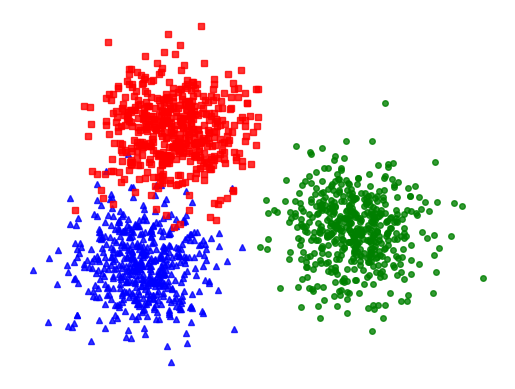

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# randomly generate data
N = 500 # number of training sample
d = 2 # data dimension
C = 3 # number of classes (for c = 0, 1, 2)
means = [[2, 2], [8, 3], [3, 6]] # centeroid of each class dataset
cov = [[1, 0], [0, 1]]

# generate 3 classes of datasets
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

# each column is a datapoint (arrange 3 vectors X1 X2 X3 then transpose matrix)
X = np.concatenate((X0, X1, X2), axis = 0).T
print("X shape: ", X.shape)

# Generate label for data points of each class (0, 1, 2)
# with first 500 will belong to class 0, second 500 => 1 and last 500=> class 2
original_label = np.asarray([0]*N + [1]*N + [2]*N).T
print("label shape: ", original_label.shape)

def display(X, label):
    X0 = X[:, label == 0]
    X1 = X[:, label == 1]
    X2 = X[:, label == 2]
    plt.plot(X0[0, :], X0[1,:], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[0, :], X1[1,:], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[0, :], X2[1,:], 'rs', markersize = 4, alpha = .8)
    plt.axis('off')
    plt.plot()
    plt.show()
    
display(X[0:, :], original_label)

In [54]:
X_train = np.concatenate((X0[:400], X1[:400], X2[:400]), axis = 0)
Y_train = np.concatenate((original_label[:400], original_label[500:900],
original_label[1000:1400]), axis = 0)
X_val = np.concatenate((X0[400:], X1[400:], X2[400:]), axis = 0)
Y_val = np.concatenate((original_label[400:500], original_label[900:1000],
original_label[1400:1500]), axis = 0)
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)

(1200, 2) (1200,) (300, 2) (300,)


In [55]:
# ====== Bước 3. Các hàm hỗ trợ KNN ======
def distance(x1, x2):
    """Tính khoảng cách Euclidean giữa hai điểm 2D"""
    return np.sqrt(np.sum((x1 - x2)**2))

def find_nearest_index(X_train, x_val, K):
    """Tìm chỉ số K điểm gần nhất trong X_train với x_val"""
    distances = np.sqrt(np.sum((X_train - x_val)**2, axis=1))
    return np.argsort(distances)[:K]

def highest_rank(y_nearest):
    """Trả về nhãn xuất hiện nhiều nhất trong K lân cận"""
    values, counts = np.unique(y_nearest, return_counts=True)
    return values[np.argmax(counts)]

🔹 Nhãn dự đoán (y_pred):
 [0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2
 0 2 2 2]
🔹 Nhãn thật (Y_val):
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

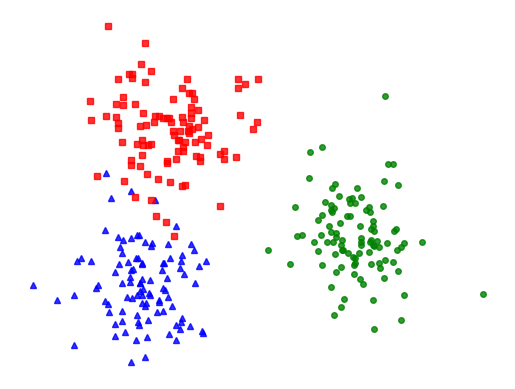

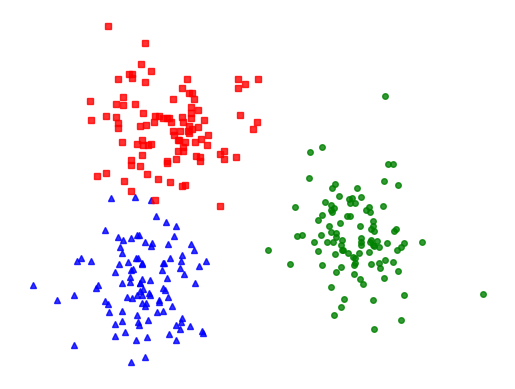

In [56]:
# ====== Bước 4. KNN dự đoán ======
K = 20
y_pred = np.zeros(len(Y_val)).astype(int)

for j in range(len(Y_val)):
    indexes = find_nearest_index(X_train, X_val[j], K)
    y_nearest = [Y_train[i] for i in indexes]
    y_pred[j] = highest_rank(y_nearest)

# ====== Bước 5. So sánh kết quả ======
print("🔹 Nhãn dự đoán (y_pred):\n", y_pred)
print("🔹 Nhãn thật (Y_val):\n", Y_val)

# Hiển thị trực quan để so sánh
display(X_val.T, Y_val)
display(X_val.T, y_pred)


VÍ DỤ A2


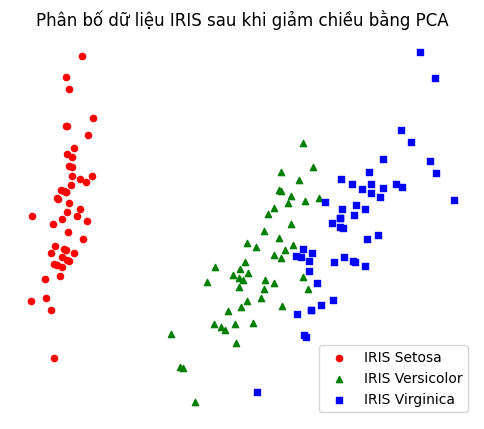

===== ĐÁNH GIÁ MÔ HÌNH KNN =====
Accuracy: 1.0
Precision (macro): 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

Báo cáo chi tiết:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


In [57]:
# ==============================================
# Ví dụ A.2 – Phân loại hoa IRIS bằng KNN
# ==============================================

import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

# 1️⃣ Load dữ liệu IRIS
iris = datasets.load_iris()
X = iris.data[:, :4]   # 4 đặc trưng: sepal length, sepal width, petal length, petal width
Y = iris.target        # 3 lớp: setosa (0), versicolor (1), virginica (2)

# 2️⃣ Chuẩn hoá dữ liệu về [0, 1]
X_norm = (X - X.min()) / (X.max() - X.min())

# 3️⃣ Giảm chiều dữ liệu bằng PCA (2D) để trực quan hóa
pca = sklearnPCA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(X_norm))

plt.figure(figsize=(6, 5))
plt.axis("off")
plt.scatter(transformed[Y==0][0], transformed[Y==0][1], s=20, label='IRIS Setosa', c='red')
plt.scatter(transformed[Y==1][0], transformed[Y==1][1], s=20, label='IRIS Versicolor', c='green', marker="^")
plt.scatter(transformed[Y==2][0], transformed[Y==2][1], s=20, label='IRIS Virginica', c='blue', marker="s")
plt.legend()
plt.title("Phân bố dữ liệu IRIS sau khi giảm chiều bằng PCA")
plt.show()

# 4️⃣ Chia dữ liệu thành Train (40 mẫu mỗi lớp) và Validation (10 mẫu mỗi lớp)
X_train = np.vstack((X_norm[0:40, :], X_norm[50:90, :], X_norm[100:140, :]))
Y_train = np.hstack((Y[0:40], Y[50:90], Y[100:140]))

X_val = np.vstack((X_norm[40:50, :], X_norm[90:100, :], X_norm[140:150, :]))
Y_val = np.hstack((Y[40:50], Y[90:100], Y[140:150]))

# 5️⃣ Huấn luyện mô hình KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

# 6️⃣ Dự đoán trên tập Validation
Y_pred = knn.predict(X_val)

# 7️⃣ Đánh giá kết quả
print("===== ĐÁNH GIÁ MÔ HÌNH KNN =====")
print("Accuracy:", round(accuracy_score(Y_val, Y_pred), 4))
print("Precision (macro):", round(precision_score(Y_val, Y_pred, average='macro'), 4))
print("\nConfusion Matrix:\n", confusion_matrix(Y_val, Y_pred))
print("\nBáo cáo chi tiết:\n", classification_report(Y_val, Y_pred, target_names=iris.target_names))


B. HỒI QUY SOFTMAX (MULTINOMIAL LOGISTIC REGRESSION)

VÍ DỤ B1:

X shape:  (2, 1500)
label shape:  (1500,)


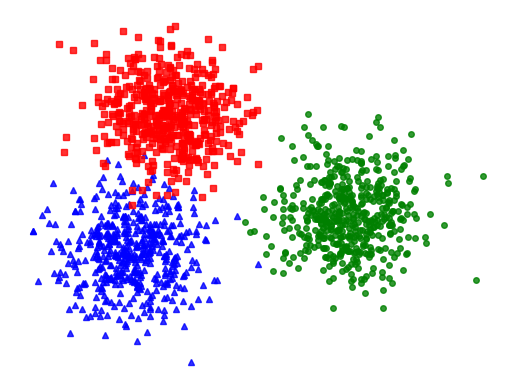

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# randomly generate data
N = 500 # number of training sample
d = 2 # data dimension
C = 3 # number of classes (for c = 0, 1, 2)
means = [[2, 2], [8, 3], [3, 6]] # centeroid of each class dataset
cov = [[1, 0], [0, 1]]

# generate 3 classes of datasets
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

# each column is a datapoint (arrange 3 vectors X1 X2 X3 then transpose matrix)
X = np.concatenate((X0, X1, X2), axis = 0).T
print("X shape: ", X.shape)

# Generate label for data points of each class (0, 1, 2)
# with first 500 will belong to class 0, second 500 => 1 and last 500=> class 2
original_label = np.asarray([0]*N + [1]*N + [2]*N).T
print("label shape: ", original_label.shape)

def display(X, label):
    X0 = X[:, label == 0]
    X1 = X[:, label == 1]
    X2 = X[:, label == 2]
    plt.plot(X0[0, :], X0[1,:], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[0, :], X1[1,:], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[0, :], X2[1,:], 'rs', markersize = 4, alpha = .8)
    plt.axis('off')
    plt.plot()
    plt.show()
    
display(X[0:, :], original_label)

X shape:  (2, 1500)
label shape:  (1500,)


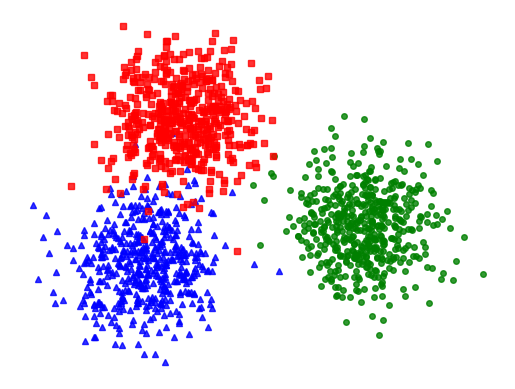

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# randomly generate data
N = 500 # number of training sample
d = 2 # data dimension
C = 3 # number of classes (for c = 0, 1, 2)
means = [[2, 2], [8, 3], [3, 6]] # centeroid of each class dataset
cov = [[1, 0], [0, 1]]

# generate 3 classes of datasets
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

# each column is a datapoint (arrange 3 vectors X1 X2 X3 then transpose matrix)
X = np.concatenate((X0, X1, X2), axis = 0).T
print("X shape: ", X.shape)

# Generate label for data points of each class (0, 1, 2)
# with first 500 will belong to class 0, second 500 => 1 and last 500=> class 2
original_label = np.asarray([0]*N + [1]*N + [2]*N).T
print("label shape: ", original_label.shape)

def display(X, label):
    X0 = X[:, label == 0]
    X1 = X[:, label == 1]
    X2 = X[:, label == 2]
    plt.plot(X0[0, :], X0[1,:], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[0, :], X1[1,:], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[0, :], X2[1,:], 'rs', markersize = 4, alpha = .8)
    plt.axis('off')
    plt.plot()
    plt.show()
    
display(X[0:, :], original_label)

In [60]:
def softmax_stable(Z):
    """
    Compute softmax values for each sets of scores in Z.
    each column of Z is a set of score.
    """
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A

def convert_labels(y, C):
    """
    Chuyển vector nhãn y (các giá trị 0..C-1)
    thành ma trận one-hot encoding kích thước (C, N)
    """
    Y = np.eye(C)[y]   # np.eye(C) tạo ma trận đơn vị CxC, chọn hàng theo chỉ số y
    return Y.T         # trả về dạng (C, N)


def softmax(Z):
    """
    #Compute softmax values for each sets of scores in V.
    #each column of V is a set of score.
    """
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A

def softmax_regression(X, y, W_init, eta, tol = 1e-4, max_count = 10000):
    W = [W_init]
    C = W_init.shape[1]
    Y = convert_labels(y, C)
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    
    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax(np.dot(W[-1].T, xi))
            W_new = W[-1] + eta*xi.dot((yi - ai).T)
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W
            W.append(W_new)
    return W

# cost or loss function
def cost(X, Y, W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))

# Predict that X belong to which class (1..C now indexed as 0..C-1 )
def pred(W, X):
    """
    predict output of each columns of X
    Class of each x_i is determined by location of max probability
    Note that class are indexed by [0, 1, 2, ...., C-1]
    """
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis = 0)

  


In [61]:
# extended data by add row ONES (equivalent to 1) at first place
X = np.concatenate((np.ones((1, 3*N)), X), axis = 0)
print(X.shape)

# W[-1] is the solution, W is all history of weights
eta = .05
d = X.shape[0]
W_init = np.random.randn(X.shape[0], C)
W = softmax_regression(X, original_label, W_init, eta)
print(W[-1])

(3, 1500)
[[ 7.99422864 -3.76074293 -3.96912628]
 [-1.03931466  1.53642824 -0.9513821 ]
 [-1.54453671 -1.54486989  1.42366264]]


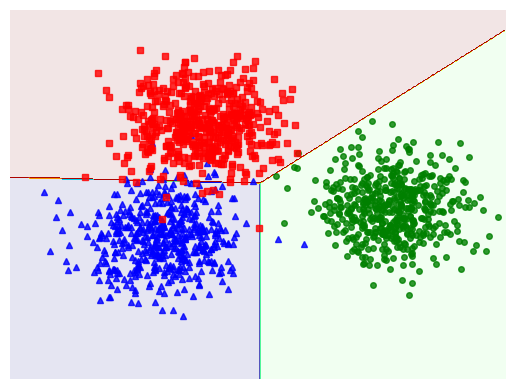

<Figure size 640x480 with 0 Axes>

In [62]:
# Visualize (chuẩn thầy)
xm = np.arange(-2, 11, 0.025)
ym = np.arange(-3, 10, 0.025)
xx, yy = np.meshgrid(xm, ym)

xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)

XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis=0)

Z = pred(W[-1], XX)
Z = Z.reshape(xx.shape)

CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha=.1)
plt.xlim(-2, 11)
plt.ylim(-3, 10)
plt.xticks(())
plt.yticks(())
display(X[1:, :], original_label)
plt.savefig('ex1.png', bbox_inches='tight', dpi=300)
plt.show()


Accuracy Score: 0.9767
Precision Score: 0.9775
Recall Score: 0.9757


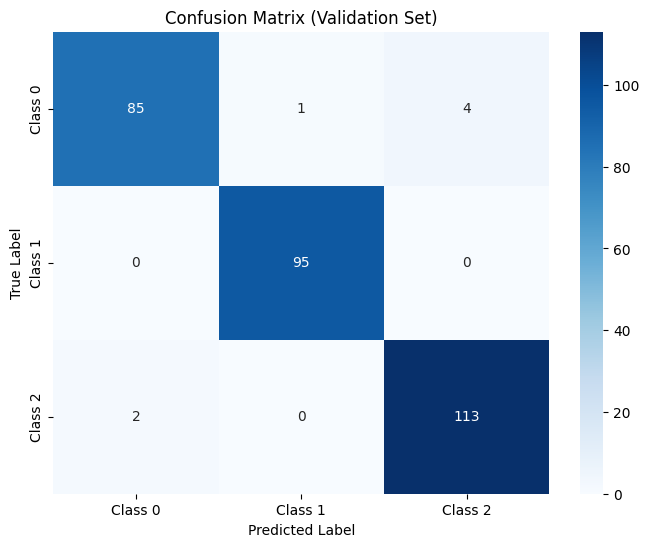

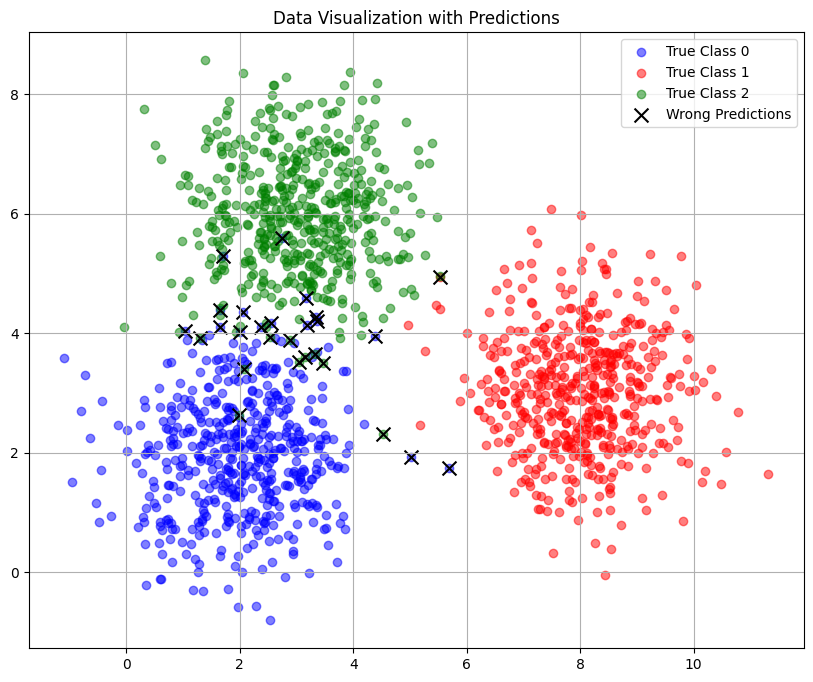

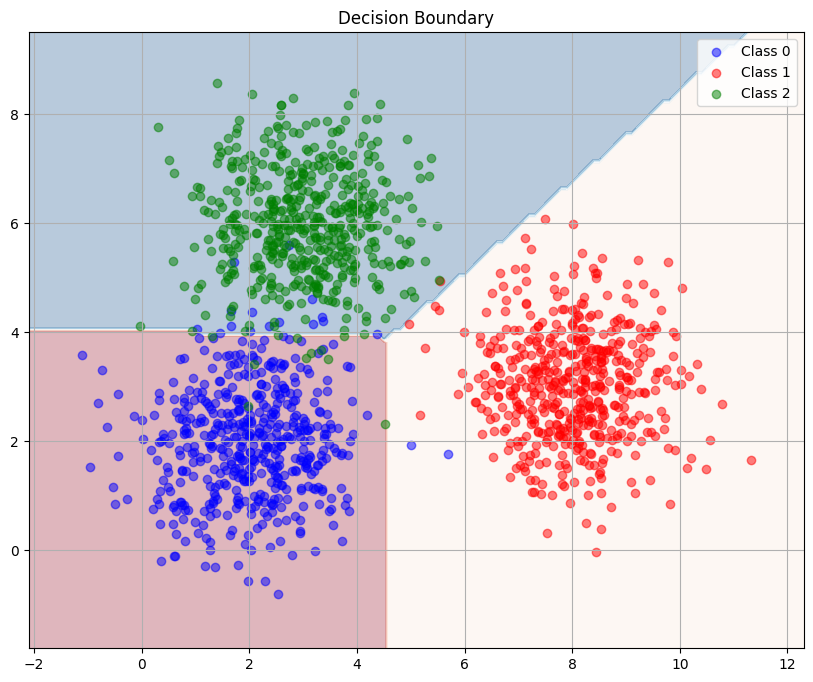

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Chia dữ liệu ngẫu nhiên thành train và validation (80% train, 20% validation)
np.random.seed(42)  # Để kết quả có thể tái hiện
N_total = 3 * N  # Tổng số mẫu
indices = np.random.permutation(N_total)  # Tạo một permutation ngẫu nhiên của các chỉ số
N_train = int(0.8 * N_total)  # Số mẫu cho tập train

# Lấy chỉ số cho train và validation
train_indices = indices[:N_train]
val_indices = indices[N_train:]

# Chia dữ liệu X và nhãn y theo các chỉ số ngẫu nhiên
X_train = X[:, train_indices]
y_train = original_label[train_indices]
X_val = X[:, val_indices]
y_val = original_label[val_indices]

# Dự đoán trên tập validation
y_val_pred = pred(W[-1], X_val)

# Tính các metric đánh giá
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='macro')
recall = recall_score(y_val, y_val_pred, average='macro')

# In kết quả
print(f"Accuracy Score: {accuracy:.4f}")
print(f"Precision Score: {precision:.4f}")
print(f"Recall Score: {recall:.4f}")

# Tính và vẽ ma trận nhầm lẫn
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.title('Confusion Matrix (Validation Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Trực quan hóa dữ liệu và kết quả dự đoán
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']

# Vẽ toàn bộ dữ liệu (không tính hàng bias)
X_plot = X[1:, :]  # Bỏ hàng bias để vẽ 2D
y_all_pred = pred(W[-1], X)

for i in range(C):
    plt.scatter(X_plot[0, original_label == i], X_plot[1, original_label == i],
                c=colors[i], alpha=0.5, label=f'True Class {i}')

# Đánh dấu các điểm dự đoán sai
wrong_pred = original_label != y_all_pred
plt.scatter(X_plot[0, wrong_pred], X_plot[1, wrong_pred],
            c='black', marker='x', s=100, label='Wrong Predictions')

plt.title('Data Visualization with Predictions')
plt.legend()
plt.grid(True)
plt.show()

# Vẽ đường phân cách quyết định (decision boundary)
def plot_decision_boundary(X, W, means):
    x_min, x_max = X[1, :].min() - 1, X[1, :].max() + 1
    y_min, y_max = X[2, :].min() - 1, X[2, :].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Thêm bias vào grid
    grid = np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()].T
    Z = pred(W, grid)
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')
    for i in range(C):
        plt.scatter(X[1, original_label == i], X[2, original_label == i],
                   c=colors[i], alpha=0.5, label=f'Class {i}')
    plt.title('Decision Boundary')
    plt.legend()
    plt.grid(True)
    plt.show()

# Gọi hàm vẽ decision boundary
plot_decision_boundary(X, W[-1], means)

VÍ DỤ B.2

a, THỰC HÀNH 1

Import và Load dữ liệu

In [64]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix
iris = load_iris()
X = iris.data  
y = iris.target 
N, d = X.shape
C = len(np.unique(y))  
X = np.concatenate((np.ones((N, 1)), X), axis=1)  
d = d + 1   


In [65]:
def stratified_split(X, y, ratio=0.8):
    X_train, X_val, y_train, y_val = [], [], [], []
    for cls in np.unique(y):
        idx = np.where(y == cls)[0]
        np.random.shuffle(idx)
        split = int(len(idx) * ratio)
        train_idx, val_idx = idx[:split], idx[split:]
        X_train.append(X[train_idx])
        X_val.append(X[val_idx])
        y_train.append(y[train_idx])
        y_val.append(y[val_idx])
    return (np.vstack(X_train), np.hstack(y_train),
            np.vstack(X_val), np.hstack(y_val))

X_train, y_train, X_val, y_val = stratified_split(X, y, ratio=0.8)


In [66]:
def convert_labels(y, C):
    Y = np.zeros((C, y.shape[0]))
    for i in range(y.shape[0]):
        Y[y[i], i] = 1
    return Y

def softmax(Z):
    e_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return e_Z / e_Z.sum(axis=0, keepdims=True)



 Huấn luyện Softmax Regression

In [67]:
def softmax_regression(X, y, eta=0.05, tol=1e-4, max_count=10000):
    N, d = X.shape
    C = len(np.unique(y))
    W = np.random.randn(d, C) * 0.01
    Y = convert_labels(y, C) 
    for it in range(max_count):
        scores = W.T.dot(X.T)         
        probs = softmax(scores)         
        grad = -X.T.dot((Y - probs).T) / N
        W_new = W - eta * grad
        if np.linalg.norm(W_new - W) < tol:
            break
        W = W_new
    return W


Dự đoán và Đánh giá

In [68]:
def predict(W, X):
    scores = W.T.dot(X.T)
    return np.argmax(softmax(scores), axis=0)
W = softmax_regression(X_train, y_train, eta=0.05)
y_pred = predict(W, X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_val, y_pred))


Accuracy: 0.9333333333333333
Confusion matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


b) Chương trình Python với các hàm/phương thức từ thư viện Scikit-Learn

Import thư viện cần thiết

Độ chính xác (Accuracy): 0.9666666666666667

Ma trận nhầm lẫn (Confusion Matrix):
 [[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


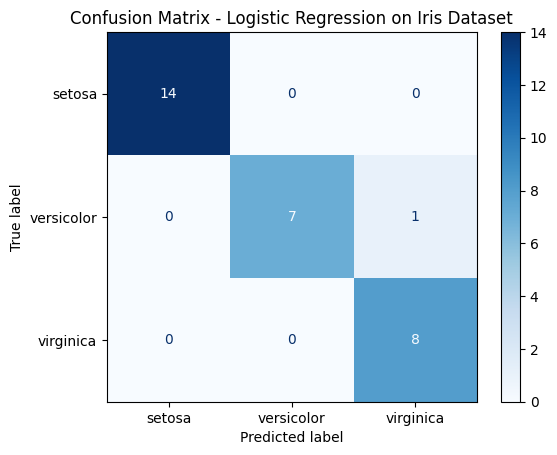

In [69]:
# ================== HỒI QUY LOGISTIC VỚI SCIKIT-LEARN ==================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

#  Load dữ liệu mẫu (Iris dataset)
iris = load_iris()
X = iris.data        # Biến quan sát (features)
Y = iris.target      # Biến mục tiêu (labels)

# ⃣ Chia dữ liệu thành tập huấn luyện và kiểm thử
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    X, Y, test_size=0.2, random_state=2
)

#  (Tuỳ chọn) Chuẩn hoá dữ liệu - có thể bật nếu muốn
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

#  Khởi tạo mô hình hồi quy logistic (đa lớp)
lorg = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=5000)

# ⃣ Huấn luyện mô hình với tập train
lorg.fit(X_train, Y_train)

#  Dự đoán nhãn cho tập test
Y_pred = lorg.predict(X_test)

# ⃣ Đánh giá kết quả mô hình
print("Độ chính xác (Accuracy):", accuracy_score(Y_test, Y_pred))

# Ma trận nhầm lẫn
cm = confusion_matrix(Y_test, Y_pred)
print("\nMa trận nhầm lẫn (Confusion Matrix):\n", cm)

# ⃣ (Tuỳ chọn) Hiển thị trực quan ma trận nhầm lẫn
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression on Iris Dataset")
plt.show()

# ======================================================================


Chia dữ liệu thành tập huấn luyện và tập kiểm thử

b) Chương trình Python với các hàm/phương thức từ thư viện Scikit-Learn

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

#from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
iris=load_iris()

# print(iris)
X=iris.data # Observed variable
Y=iris.target # Dependent variable (label)
#print(X.shape)
#print(Y.shape)

# Splitting Train and test Data
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(X,Y,test_size=0.2,
random_state=2)
#sc=StandardScaler()
#X_train=sc.fit_transform(X_train)
#X_test=sc.transform(X_test)

# Call to Logistic Regression Model - SAG: solving is based on Stochastic Average Gradient
lorg=LogisticRegression(multi_class='multinomial',solver='sag', max_iter=5000)
# and train model by Training Dataset

lorg.fit(X_train,Y_train)

# Then Predict the Test data
Y_pred = lorg.predict(X_test)

/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy Score: 0.9667
Precision Score: 0.9630
Recall Score: 0.9583


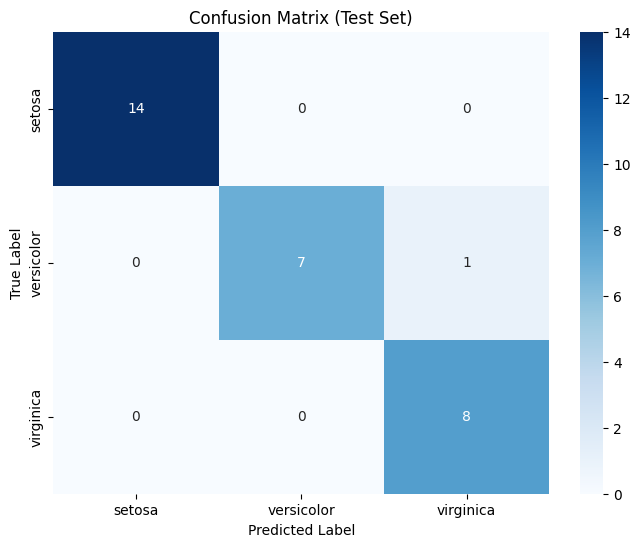

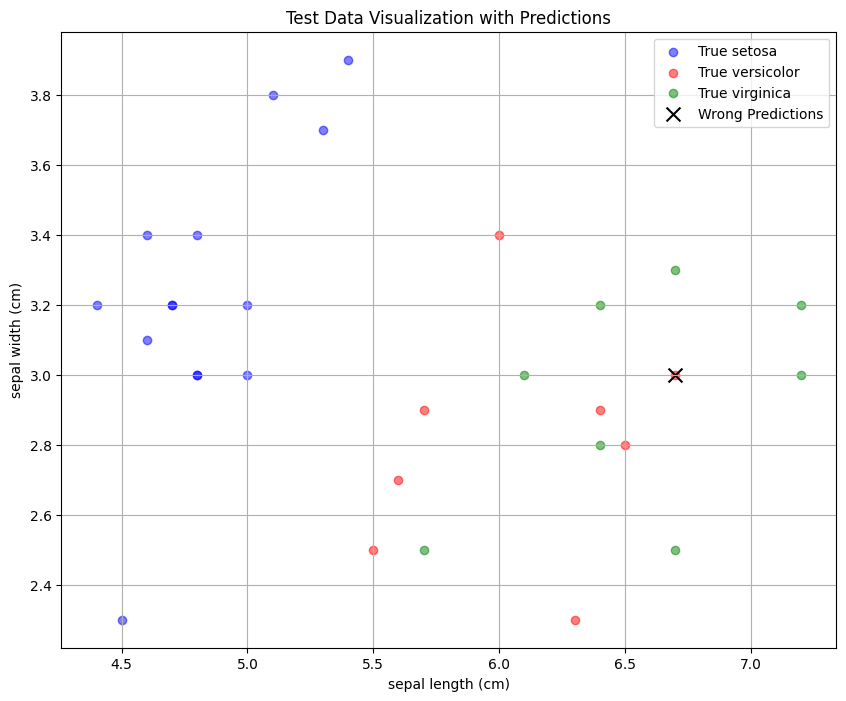

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns

# Tính các đại lượng đánh giá
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='macro')  # 'macro' để tính trung bình cho đa lớp
recall = recall_score(Y_test, Y_pred, average='macro')

# In các kết quả
print(f"Accuracy Score: {accuracy:.4f}")
print(f"Precision Score: {precision:.4f}")
print(f"Recall Score: {recall:.4f}")

# Tính và vẽ ma trận nhầm lẫn
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Confusion Matrix (Test Set)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Trực quan hóa dữ liệu và kết quả dự đoán (chỉ với X_test)
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
C = 3  # Số lớp trong Iris dataset

# Vẽ các điểm dữ liệu test theo nhãn thật
for i in range(C):
    plt.scatter(X_test[Y_test == i, 0], X_test[Y_test == i, 1],  # Chọn 2 đặc trưng đầu tiên
                c=colors[i], alpha=0.5, label=f'True {iris.target_names[i]}')

# Đánh dấu các điểm dự đoán sai trên tập test
wrong_pred = Y_test != Y_pred
plt.scatter(X_test[wrong_pred, 0], X_test[wrong_pred, 1],
            c='black', marker='x', s=100, label='Wrong Predictions')

# Thêm tiêu đề và nhãn
plt.title('Test Data Visualization with Predictions')
plt.xlabel(iris.feature_names[0])  # Tên đặc trưng 1: 'sepal length (cm)'
plt.ylabel(iris.feature_names[1])  # Tên đặc trưng 2: 'sepal width (cm)'
plt.legend()
plt.grid(True)
plt.show()


VÍ DỤ B.3 (BÀI TẬP TỰ THỰC HÀNH 2)


In [72]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.model_selection import train_test_split

n_samples = 500

X, y = fetch_20newsgroups_vectorized(subset='all', return_X_y=True)
X = X[:n_samples]
y = y[:n_samples]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
 stratify=y, test_size=0.25)

train_samples, n_features = X_train.shape
n_classes = np.unique(y).shape[0]

/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.3200
Precision: 0.3523
Recall: 0.3200


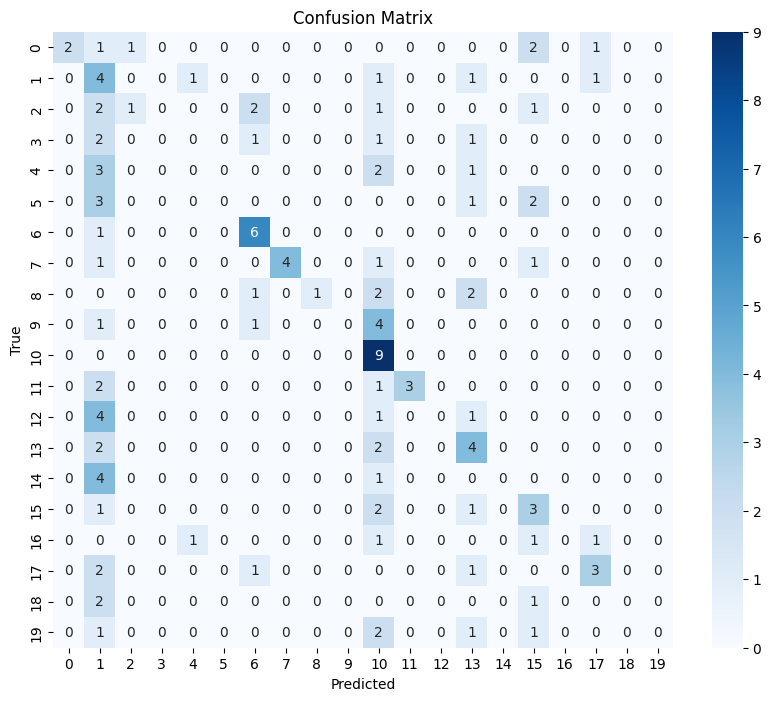

In [73]:
# Import thư viện
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Xây dựng mô hình hồi quy Logistic nhiều lớp
model = LogisticRegression(max_iter=20000, multi_class='multinomial', solver='lbfgs')

# Huấn luyện mô hình trên dữ liệu huấn luyện
model.fit(X_train, y_train)

# Dự đoán trên dữ liệu kiểm tra
y_pred = model.predict(X_test)

# Tính toán các chỉ số đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# In ra kết quả đánh giá
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_pred)

# Hiển thị ma trận nhầm lẫn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Huấn luyện Logistic Regression nhiều lớp

VÍ DỤ B.4 (BÀI TẬP TỰ THỰC HÀNH 3).

In [74]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
file_data = '/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab5/glass.csv - glass.csv.csv'
glass_df = pd.read_csv(file_data)
print(glass_df.info())
glass_types = glass_df['Type'].unique()
print(glass_types)
print(glass_df['Type'].value_counts())
X_1 = glass_df[glass_df.columns[:-1]]
y_1 = glass_df['Type']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1,

test_size=0.25,
random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id_Number  214 non-null    int64  
 1   RI         214 non-null    float64
 2   Na         214 non-null    float64
 3   Mg         214 non-null    float64
 4   Al         214 non-null    float64
 5   Si         214 non-null    float64
 6   K          214 non-null    float64
 7   Ca         214 non-null    float64
 8   Ba         214 non-null    float64
 9   Fe         214 non-null    float64
 10  Type       214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB
None
[1 2 3 5 6 7]
Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


Độ chính xác (Accuracy): 0.9814814814814815
Confusion Matrix:
 [[13  1  0  0  0  0]
 [ 0 21  0  0  0  0]
 [ 0  0  4  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


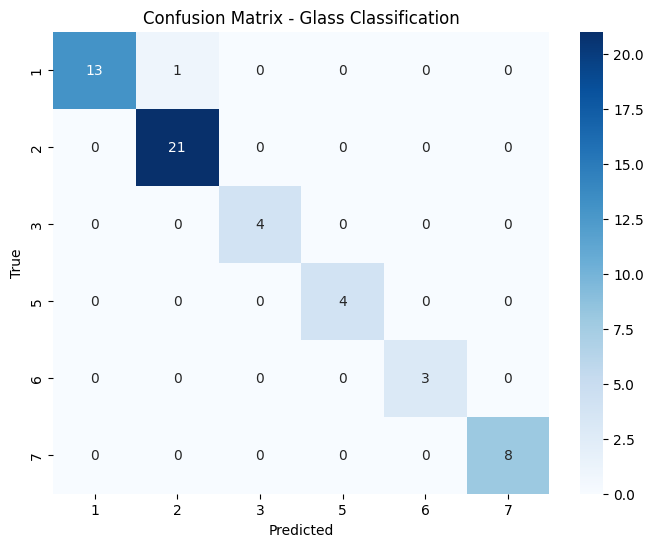

Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.95      1.00      0.98        21
           3       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           0.98        54
   macro avg       0.99      0.99      0.99        54
weighted avg       0.98      0.98      0.98        54


In [75]:
# Xây dựng mô hình Logistic Regression đa lớp
log_reg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=42, 
)


log_reg.fit(X_train, y_train) 


y_pred = log_reg.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Độ chính xác (Accuracy):", acc)

cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=log_reg.classes_,
            yticklabels=log_reg.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Glass Classification")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

So sánh với Naive Bayes


Độ chính xác Logistic Regression: 0.9814814814814815
Độ chính xác Naive Bayes: 0.8518518518518519
Logistic Regression Classification Report
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           2       0.95      1.00      0.98        21
           3       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         8

    accuracy                           0.98        54
   macro avg       0.99      0.99      0.99        54
weighted avg       0.98      0.98      0.98        54

 Naive Bayes Classification Report
              precision    recall  f1-score   support

           1       0.87      0.93      0.90        14
           2       0.94      0.76      0.84        21
           3       0.50      0.75      0.60         4
           5       0.80      1.00      0.89         4
           

/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


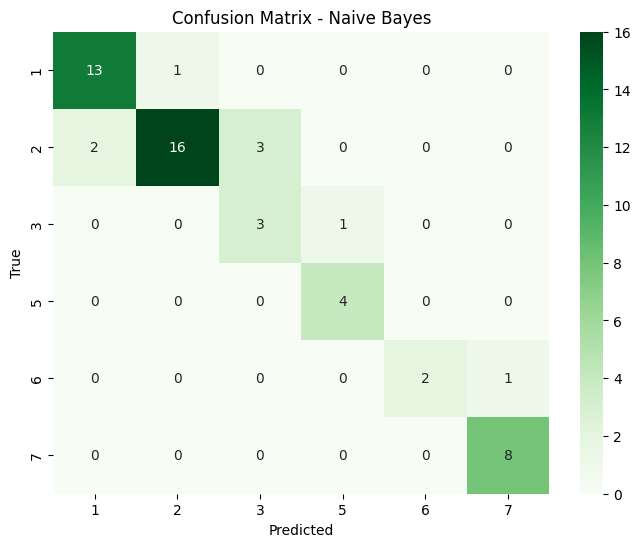

In [76]:
from sklearn.naive_bayes import GaussianNB

log_reg = LogisticRegression(
    multi_class= 'multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
log_reg.fit(X_train,y_train)
y_pred_log = log_reg.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)

 #Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

print("Độ chính xác Logistic Regression:", acc_log)
print("Độ chính xác Naive Bayes:", acc_nb)

print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_log))

print(" Naive Bayes Classification Report")
print(classification_report(y_test, y_pred_nb))

cm_nb = confusion_matrix(y_test, y_pred_nb, labels=nb.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap="Greens",
            xticklabels=nb.classes_,
            yticklabels=nb.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

VÍ DỤ 4(BÀI TẬP THỰC HÀNH 4)

In [77]:
import os
import numpy as np

# set names to the paths because they're too long
data_path = '/Users/nguyencongtri/PycharmProjects/MachineLearning/Lab5/data'
# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

In [78]:
def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    """
    This shuffle param is active when .gz is downloaded at:
    - 'http://yann.lecun.com/exdb/mnist/'
    - This function return random num_images in 60000 or 10000
    """
    # read data
    import gzip # to decompress gz (zip) file
    # open file training to read training data
    f_images = gzip.open(images_path,'r')

    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)

    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000)
    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)

    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)

    # Read labels
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)

    labels = np.zeros((real_num)).astype(np.int64)

    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)

    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)

        images = images[rand_id, :]
        labels = labels[rand_id,]

    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

# Gọi phương thức đọc dữ liệu để kiếm tra xem đọc đúng hay không:
train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 5000, shuffle=True)
test_images, test_labels = get_mnist_data(  test_images_path, test_labels_path, 10000, _is=False, shuffle=True)
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(5000, 784) (5000,)
(10000, 784) (10000,)


/var/folders/2p/p4mj443j4j56m0lgzq98w6qc0000gp/T/ipykernel_37401/1455698676.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)


In [79]:
# Convert matrix to image
def get_image(image):
    return image.reshape(28, 28)

def convert_labels(y, C):
    from scipy import sparse
    Y = sparse.coo_matrix((np.ones_like(y),
    (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

def softmax(Z):
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A

def softmax_stable(Z):
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A

def pred(W, X):
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis = 0)

def _softmax_regression(X, Y, theta, lambda_=0.5, iterations=20, learning_rate=1e-5, batch_size=200):
    from sklearn.metrics import log_loss

    losses = []
    _theta = theta
    d, N = X.shape

    for iter_ in range(iterations):
        shuffle_index = np.random.permutation(N)
        for i in shuffle_index:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(10, 1)
            ai = softmax_stable(np.dot(_theta.T, xi))
            _theta += learning_rate * xi.dot((yi - ai).T)
            if (iter_ * N + i) % batch_size == 0:
                Y_hat = np.dot(_theta.T, X)
                losses.append(log_loss(Y, Y_hat))

        Y_hat = np.dot(_theta.T, X)
        print(f"epoch {iter_} - cost {log_loss(Y, Y_hat) / N}")

    return _theta, losses

4 6


<Figure size 640x480 with 0 Axes>

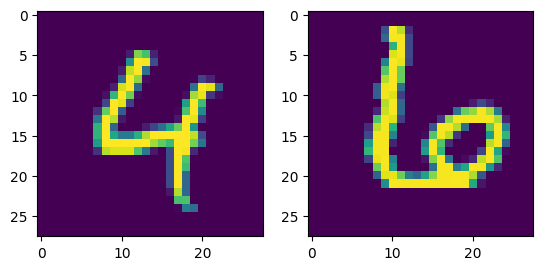

In [80]:
# for display and test digit :D
import random
import matplotlib.pyplot as plt

index = random.randint(0, 1000)
print(train_labels[index], test_labels[index])

train_image = np.asarray(get_image(train_images[index])).squeeze()
test_image = np.asarray(get_image(test_images[index])).squeeze()

plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 2)

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(train_image)
axarr[1].imshow(test_image)
plt.show()

In [81]:
# Chuẩn bị dữ liệu huấn luyện
X_train = np.concatenate((np.ones((1, train_images.shape[0])), train_images.T), axis = 0)
Y_train = convert_labels(train_labels, 10)
print(X_train.shape)
print(Y_train.shape)

theta = np.zeros((X_train.shape[0], 10))
opt_theta, losses = _softmax_regression(X_train, Y_train, theta)
print('training success: ', opt_theta.shape, len(losses))

from sklearn.metrics import accuracy_score
print('accuracy training data: ', accuracy_score(train_labels, pred(opt_theta, X_train)))
# test_images, test_labels = get_mnist_data(
# test_images_path, test_labels_path, 1000, _is=False, shuffle=False)
X_test = np.concatenate((np.ones((1, test_images.shape[0])), test_images.T), axis = 0)
print(X_test.shape)
print('accuracy testing data: ', accuracy_score(test_labels,
pred(opt_theta, X_test)))

(785, 5000)
(10, 5000)


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklear

epoch 0 - cost 0.01949835266084121


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklear

epoch 1 - cost 0.010102112326227338


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklear

epoch 2 - cost 0.010813096016735167


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklear

epoch 3 - cost 0.007208730677823454


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklear

epoch 4 - cost 0.0036065264996062497


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklear

epoch 5 - cost 0.004331390171636142


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklear

epoch 6 - cost 0.0028887212226214377


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklear

epoch 7 - cost 0.0014417461355647084


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklear

epoch 8 - cost 0.0021626192033470516


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklear

epoch 9 - cost 0.0021626192033470507


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklear

epoch 10 - cost 0.0014417461355647082


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklear

epoch 11 - cost 0.0014417461355647084


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklear

epoch 12 - cost 0.0014417461355647084


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklear

epoch 13 - cost 0.000720873067782365


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklear

epoch 14 - cost 2.2204460492503138e-17


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklear

epoch 15 - cost 0.0007208730677823652


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklear

epoch 16 - cost 2.2204460492503138e-17


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklear

epoch 17 - cost 2.2204460492503138e-17


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklear

epoch 18 - cost 2.2204460492503138e-17


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklear

epoch 19 - cost 2.2204460492503138e-17
training success:  (785, 10) 500
accuracy training data:  0.9386
(785, 10000)
accuracy testing data:  0.8707


/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:3001: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklear

BÀI THỰC HÀNH 4

/var/folders/2p/p4mj443j4j56m0lgzq98w6qc0000gp/T/ipykernel_37401/1455698676.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)


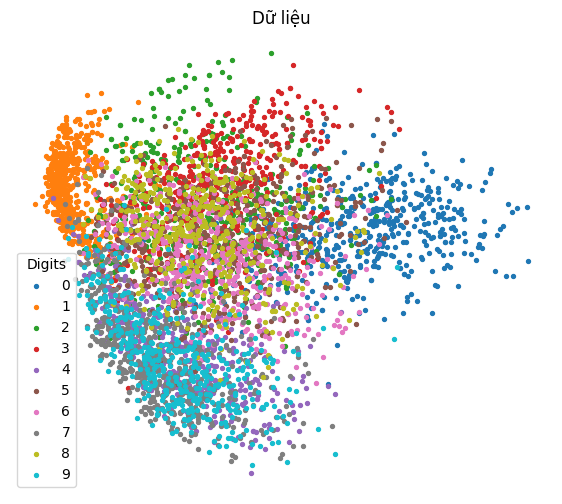

/Users/nguyencongtri/PycharmProjects/MachineLearning/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


accuracy training data :  1.0
accuracy testing data  :  0.8688


In [82]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression

train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 5000, shuffle=True)
test_images, test_labels   = get_mnist_data(test_images_path, test_labels_path, 10000, _is=False, shuffle=True)

pca = PCA(n_components=2)
train_2D = pca.fit_transform(train_images)
plt.figure(figsize=(7,6))
for i in range(10):
    plt.scatter(train_2D[train_labels == i, 0],
                train_2D[train_labels == i, 1],
                s=8, label=f'{i}')
plt.legend(title="Digits")
plt.title("Dữ liệu")
plt.axis('off')
plt.show()

clf = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
clf.fit(train_images, train_labels)

train_pred = clf.predict(train_images)
test_pred = clf.predict(test_images)

print('accuracy training data : ', accuracy_score(train_labels, train_pred))
print('accuracy testing data  : ', accuracy_score(test_labels, test_pred))